In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import mglearn
from sklearn.model_selection import train_test_split

# データセットの生成

In [2]:
# forgeデータセットの生成
X, y = mglearn.datasets.make_forge()

X.shape: (26, 2)


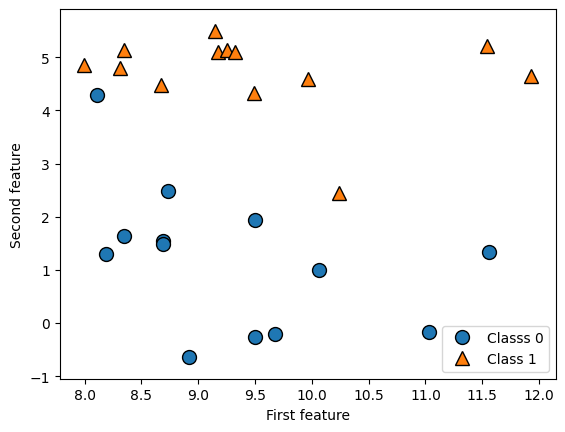

In [3]:
# データセットをプロット
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.legend(["Classs 0", "Class 1"], loc=4)
plt.xlabel("First feature")
plt.ylabel("Second feature")
print("X.shape: {}".format(X.shape))

In [4]:
# waveデータセットの生成
X, y = mglearn.datasets.make_wave(n_samples=40)

Text(0, 0.5, 'Target')

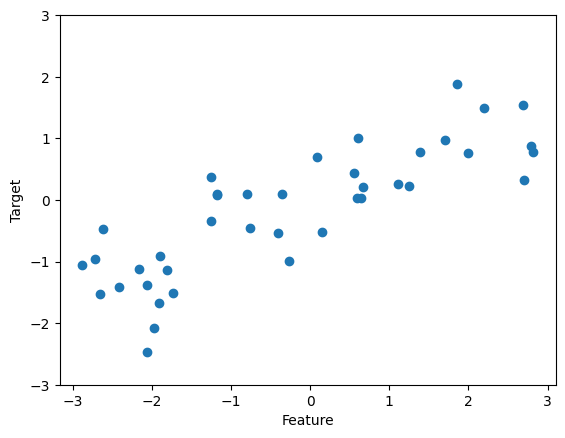

In [5]:
# データセットをプロット
plt.plot(X, y, 'o')
plt.ylim(-3, 3)
plt.xlabel("Feature")
plt.ylabel("Target")

In [6]:
# cancerデータセットの生成
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
print("cancer.key(): \n{}".format(cancer.keys()))

cancer.key(): 
dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])


In [7]:
# データセットの確認
print("Shape of cancer data: {}".format(cancer.data.shape))
print("Sample counts per class:\n{}".format(
    {n: v for n, v in zip(cancer.target_names, np.bincount(cancer.target))}))
print("Feature names:\n{}".format(cancer.feature_names))

Shape of cancer data: (569, 30)
Sample counts per class:
{'malignant': 212, 'benign': 357}
Feature names:
['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


In [8]:
# boston_housingデータセットの生成
from sklearn.datasets import load_boston
boston = load_boston()
print("Data shape: {}".format(boston.data.shape))

ImportError: 
`load_boston` has been removed from scikit-learn since version 1.2.

The Boston housing prices dataset has an ethical problem: as
investigated in [1], the authors of this dataset engineered a
non-invertible variable "B" assuming that racial self-segregation had a
positive impact on house prices [2]. Furthermore the goal of the
research that led to the creation of this dataset was to study the
impact of air quality but it did not give adequate demonstration of the
validity of this assumption.

The scikit-learn maintainers therefore strongly discourage the use of
this dataset unless the purpose of the code is to study and educate
about ethical issues in data science and machine learning.

In this special case, you can fetch the dataset from the original
source::

    import pandas as pd
    import numpy as np

    data_url = "http://lib.stat.cmu.edu/datasets/boston"
    raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
    data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
    target = raw_df.values[1::2, 2]

Alternative datasets include the California housing dataset and the
Ames housing dataset. You can load the datasets as follows::

    from sklearn.datasets import fetch_california_housing
    housing = fetch_california_housing()

for the California housing dataset and::

    from sklearn.datasets import fetch_openml
    housing = fetch_openml(name="house_prices", as_frame=True)

for the Ames housing dataset.

[1] M Carlisle.
"Racist data destruction?"
<https://medium.com/@docintangible/racist-data-destruction-113e3eff54a8>

[2] Harrison Jr, David, and Daniel L. Rubinfeld.
"Hedonic housing prices and the demand for clean air."
Journal of environmental economics and management 5.1 (1978): 81-102.
<https://www.researchgate.net/publication/4974606_Hedonic_housing_prices_and_the_demand_for_clean_air>


In [9]:
# boston_housingデータセット生成関数の定義
# https://stackoverflow.com/questions/57645829/why-am-i-getting-a-syntaxwarning-invalid-escape-sequence-s-warning
# https://wayama.io/article/library/sklearn/datasets/
# https://bbengfort.github.io/2016/04/bunch-data-management/
# https://www.kaggle.com/code/alexandrecazals/sklearn-boston-housing-dataset
def load_boston():
    import numpy as np
    import pandas as pd
    from sklearn.utils import Bunch
    
    data_url = "http://lib.stat.cmu.edu/datasets/boston"
    raw_df = pd.read_csv(data_url, sep="\\s+", skiprows=22, header=None)
    data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
    target = raw_df.values[1::2, 2]
    target_names = ['MEDV']
    feature_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']
    DESCR = """
        .. _boston_dataset:

        Boston house prices dataset
        ---------------------------
        
        **Data Set Characteristics:**  
        
            :Number of Instances: 506 
        
            :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.
        
            :Attribute Information (in order):
                - CRIM     per capita crime rate by town
                - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
                - INDUS    proportion of non-retail business acres per town
                - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
                - NOX      nitric oxides concentration (parts per 10 million)
                - RM       average number of rooms per dwelling
                - AGE      proportion of owner-occupied units built prior to 1940
                - DIS      weighted distances to five Boston employment centres
                - RAD      index of accessibility to radial highways
                - TAX      full-value property-tax rate per $10,000
                - PTRATIO  pupil-teacher ratio by town
                - B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
                - LSTAT    % lower status of the population
                - MEDV     Median value of owner-occupied homes in $1000's
        
            :Missing Attribute Values: None
        
            :Creator: Harrison, D. and Rubinfeld, D.L.
        
        This is a copy of UCI ML housing dataset.
        https://archive.ics.uci.edu/ml/machine-learning-databases/housing/
        
        
        This dataset was taken from the StatLib library which is maintained at Carnegie Mellon University.
        
        The Boston house-price data of Harrison, D. and Rubinfeld, D.L. 'Hedonic
        prices and the demand for clean air', J. Environ. Economics & Management,
        vol.5, 81-102, 1978.   Used in Belsley, Kuh & Welsch, 'Regression diagnostics
        ...', Wiley, 1980.   N.B. Various transformations are used in the table on
        pages 244-261 of the latter.
        
        The Boston house-price data has been used in many machine learning papers that address regression
        problems.   
             
        .. topic:: References
        
           - Belsley, Kuh & Welsch, 'Regression diagnostics: Identifying Influential Data and Sources of Collinearity', Wiley, 1980. 244-261.
           - Quinlan,R. (1993). Combining Instance-Based and Model-Based Learning. In Proceedings on the Tenth International Conference of Machine Learning, 236-243, University of Massachusetts, Amherst. Morgan Kaufmann.
    """
    return Bunch(data=data,
                 target=target,
                 frame=None,
                 target_names=target_names,
                 feature_names=feature_names,
                 DESCR=DESCR)

In [10]:
boston = load_boston()
# print(boston.keys())
# print(boston.data)
# print(boston.target)
# print(boston.frame)
# print(boston.target_names)
# print(boston.feature_names)
# print(boston.DESCR)
print(type(boston))
print("Data shape: {}".format(boston.data.shape))
print("Target shape: {}".format(boston.target.shape))

df = pd.DataFrame(data=boston.data, columns=boston.feature_names)
df['MEDV'] = pd.DataFrame(data=boston.target)
df.shape
df.head()

<class 'sklearn.utils._bunch.Bunch'>
Data shape: (506, 13)
Target shape: (506,)


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [11]:
from sklearn.datasets import fetch_california_housing
california = fetch_california_housing()
# print(california.keys())
# print(california.data)
# print(california.target)
# print(california.frame)
# print(california.target_names)
# print(california.feature_names)
# print(california.DESCR)
print(type(california))
print("Data shape: {}".format(california.data.shape))
print("Target shape: {}".format(california.target.shape))

df = pd.DataFrame(data=california.data, columns=california.feature_names)
df['MedianHouseValue'] = pd.DataFrame(data=california.target)
df.shape
df.head()

<class 'sklearn.utils._bunch.Bunch'>
Data shape: (20640, 8)
Target shape: (20640,)


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedianHouseValue
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [12]:
# 特徴量の交互作用も含めたデータの読み込み
X, y = mglearn.datasets.load_extended_boston()
print("X.shape: {}".format(X.shape))

X.shape: (506, 104)


# ニューラルネットワーク
- 多層パーセプトロン（MLP:Multi-Layer Perceptron）は比較的簡単なフィードフォワード・ニューラルネットワークモデル
- クラス分類と回帰に利用することができる
- 線形モデルを一般化し、決定までに複数のステージで計算するものとみなせる
    - 出力$\hat{y}$は、入力特徴量$x[0]...x[p]$と学習された重み$w[0]...w[p]$の積和で与えられる
    - $\hat{y} = w[0]x[0] + w[1]x[1] + ... + w[p]x[p] + b$

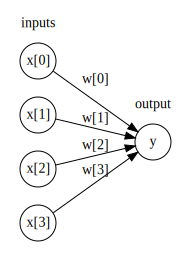

In [13]:
# ニューラルネットワークモデル（単層のMPLは線形回帰と同じ）
display(mglearn.plots.plot_logistic_regression_graph())

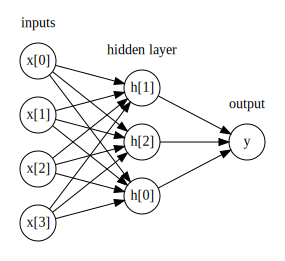

In [14]:
# 1層の隠れ層を持つMLP
display(mglearn.plots.plot_single_hidden_layer_graph())

- ニューラルネットワークモデルでは、線形モデルを上回る精度を達成するための仕掛けとして、重み付き和に対する非線形関数$f$の適用が加えられている
    - relu (rectified linear unit: 正規化線形関数)：0以下の値を切り捨てる
    - tanh (hyperbolic tangent: 双曲正接関数)：小さい値は-1に、大きい値は+1に飽和する
- $\hat{y} = f(w[0]x[0] + w[1]x[1] + ... + w[p]x[p] + b)$

Text(0, 0.5, 'relu(x), tanh(x)')

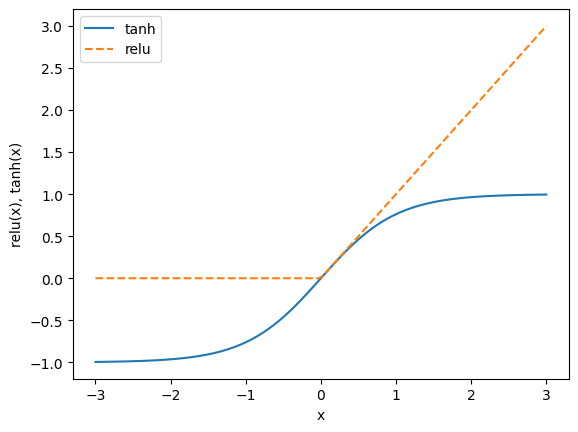

In [15]:
# 非線形関数の出力
line = np.linspace(-3, 3, 100)
plt.plot(line, np.tanh(line), label="tanh")
plt.plot(line, np.maximum(line, 0), label="relu", linestyle='--')
plt.legend(loc="best")
plt.xlabel("x")
plt.ylabel("relu(x), tanh(x)")

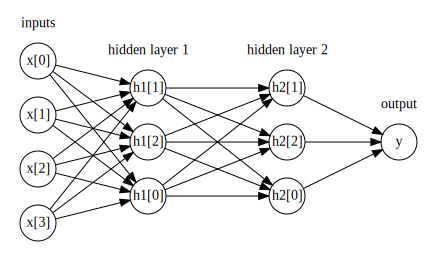

In [16]:
# 2層の隠れ層を持つMLP
mglearn.plots.plot_two_hidden_layer_graph()

## ニューラルネットワークのチューニング

Text(0, 0.5, 'Feature 1')

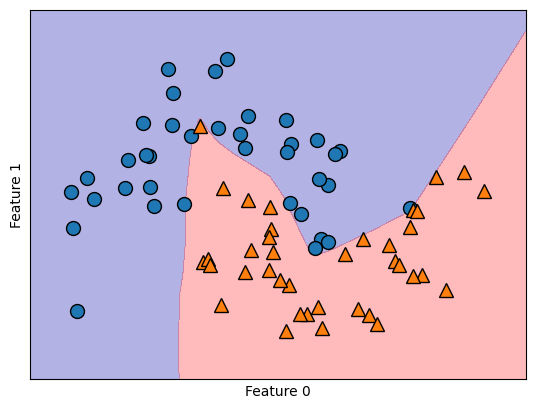

In [17]:
# MLPをtwo_moonsデータセットに適用する
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=100, noise=0.25, random_state=3)

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y,
                                                    random_state=42)

# デフォルトのパラメータ
# https://spjai.com/neural-network-parameter/
# 隠れユニットのサイズ：hidden_layer_size=[100,] ⇒ 1層/100個の隠れユニット
# 非線形関数：activation='relu' ⇒ ReLU
# 最適化手法：solver='adam' ⇒ Adam
# L2正則化のペナルティ：alpha=0.0001 ⇒ E(w)+λ/2||w||^2のλを0.0001に設定
# ミニバッチのサイズ：batch_size='auto' ⇒ batch_size=min(200, n_samples)に設定
# 学習率の初期値：learning_rate_init=0.001
# 学習率の重みの更新方法：learning_rarte='constant' ⇒ 固定
# 反復学習の最大値：max_iter=200
# ...
mlp = MLPClassifier(solver='lbfgs', random_state=0).fit(X_train, y_train)
mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3)
mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

/usr/local/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Text(0, 0.5, 'Feature 1')

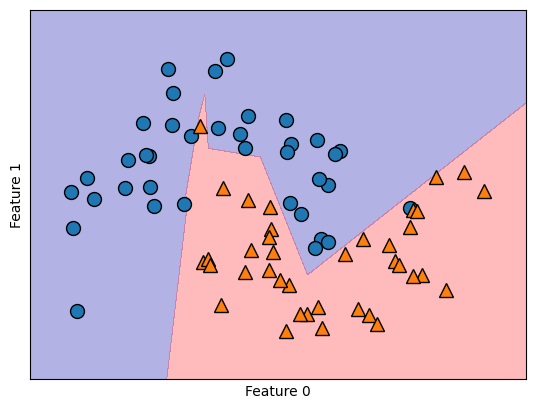

In [18]:
# 隠れユニットの個数を削減する
mlp = MLPClassifier(solver='lbfgs', random_state=0, hidden_layer_sizes=[10])
mlp.fit(X_train, y_train)
mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3)
mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

- 隠れ層が1層の場合、reluを使うと、決定曲線は10個の線分から構成されることになる
- 決定曲線を滑らかにするには、隠れ層のユニット数を増やすか、隠れ層を増やすか、非線形活性化関数にtanhを用いるとよい

Text(0, 0.5, 'Feature 1')

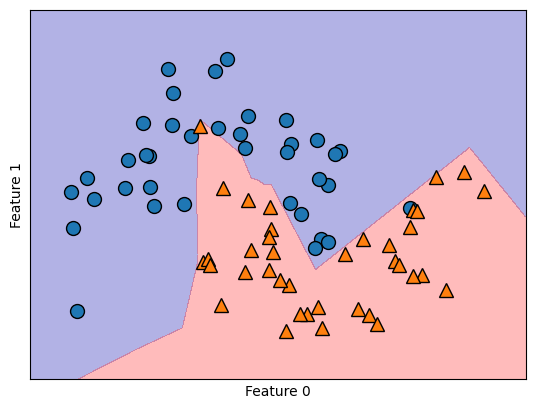

In [19]:
# 10個の隠れユニットの層を2つ持つMLP、非線形活性化関数はrelu
mlp = MLPClassifier(solver='lbfgs', random_state=0,
                    hidden_layer_sizes=[10, 10])
mlp.fit(X_train, y_train)
mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3)
mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

/usr/local/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Text(0, 0.5, 'Feature 1')

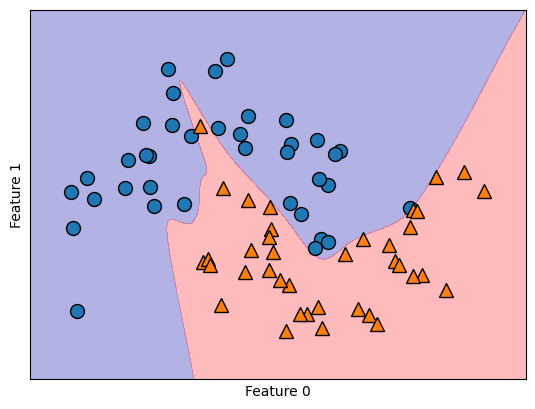

In [20]:
# 10個の隠れユニットの層を2つ持ち、非線形活性化関数にtanhを使うMLP
mlp = MLPClassifier(solver='lbfgs', activation='tanh',
                    random_state=0, hidden_layer_sizes=[10, 10])
mlp.fit(X_train, y_train)
mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3)
mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

/usr/local/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


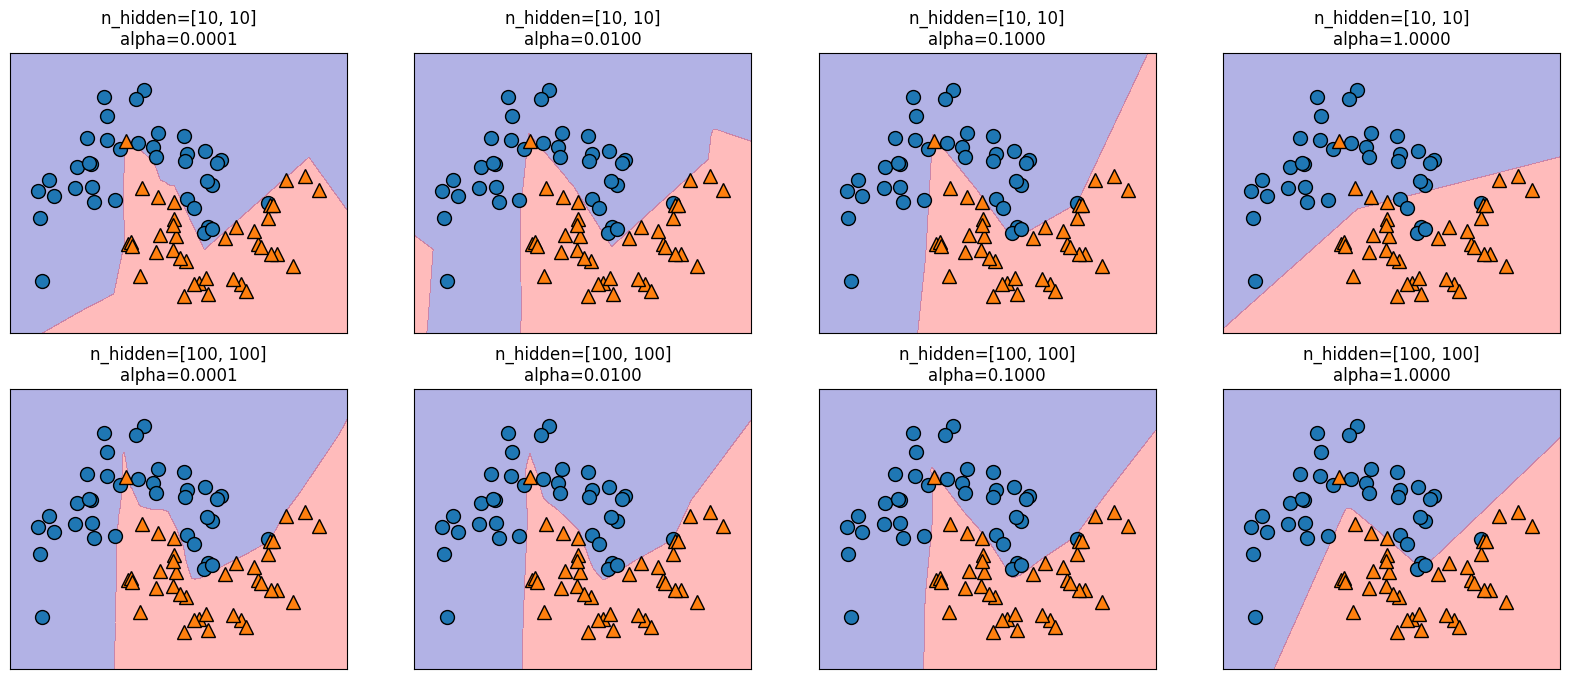

In [21]:
# MPLへの正則化の適用
fig, axes = plt.subplots(2, 4, figsize=(20, 8))
for axx, n_hidden_nodes in zip(axes, [10, 100]):
    for ax, alpha in zip(axx, [0.0001, 0.01, 0.1, 1]):
        mlp = MLPClassifier(solver='lbfgs', random_state=0,
                            hidden_layer_sizes=[n_hidden_nodes, n_hidden_nodes],
                            alpha=alpha)
        mlp.fit(X_train, y_train)
        mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3, ax=ax)
        mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train, ax=ax)
        ax.set_title("n_hidden=[{}, {}]\nalpha={:.4f}".format(
                      n_hidden_nodes, n_hidden_nodes, alpha))

- ユニット数を増やすとモデルの表現力が上がるため、データポイントへの追従性が高くなる
- alphaを大きくすると、大きな重みに対するペナルティが大きくなるため、データポイントへの追従性が低くなる

/usr/local/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


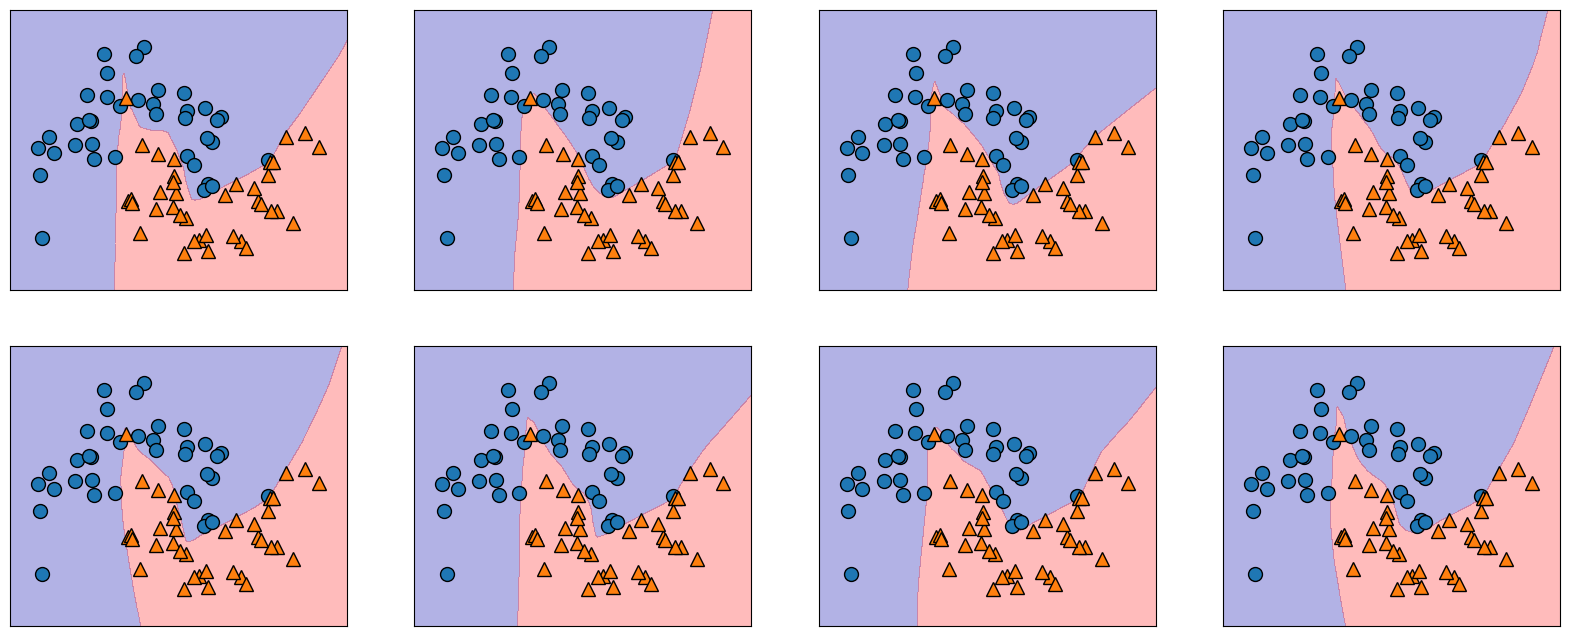

In [22]:
# 乱数シード変更の影響
fig, axes = plt.subplots(2, 4, figsize=(20, 8))
for i, ax in enumerate(axes.ravel()):
    mlp = MLPClassifier(solver='lbfgs', random_state=i,
                        hidden_layer_sizes=[100, 100])
    mlp.fit(X_train, y_train)
    mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3, ax=ax)
    mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train, ax=ax)

In [23]:
# cancerデータセットの各特徴量の最大値
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

np.set_printoptions(precision=8, floatmode='fixed')
np.set_printoptions(suppress=True)
print("Cancer data per-feature maxima:\n{}".format(cancer.data.max(axis=0)))

Cancer data per-feature maxima:
[  28.11000000   39.28000000  188.50000000 2501.00000000    0.16340000
    0.34540000    0.42680000    0.20120000    0.30400000    0.09744000
    2.87300000    4.88500000   21.98000000  542.20000000    0.03113000
    0.13540000    0.39600000    0.05279000    0.07895000    0.02984000
   36.04000000   49.54000000  251.20000000 4254.00000000    0.22260000
    1.05800000    1.25200000    0.29100000    0.66380000    0.20750000]


In [24]:
# cancerデータセットへのMLPの適用
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, random_state=0)

mlp = MLPClassifier(random_state=42)
mlp.fit(X_train, y_train)

print("Accuracy on training set: {:.2f}".format(mlp.score(X_train, y_train)))
print("Accuracy on test set: {:.2f}".format(mlp.score(X_test, y_test)))

Accuracy on training set: 0.94
Accuracy on test set: 0.92


In [25]:
# 入力データセットのスケール変換

# 訓練セットの特徴量ごとの平均値を算出
mean_on_train = X_train.mean(axis=0)
# 訓練セットの特徴量ごとの標準偏差を算出
std_on_train = X_train.std(axis=0)

# 平均を引き、標準偏差の逆数でスケール変換する
# これでmean=0、std=1になる
X_train_scaled = (X_train - mean_on_train) / std_on_train
# まったく同じ変換（訓練データの平均と標準偏差を使って）をテストセットに施す
X_test_scaled = (X_test - mean_on_train) / std_on_train

mlp = MLPClassifier(random_state=0)
mlp.fit(X_train_scaled, y_train)

print("Accuracy on training set: {:.3f}".format(
    mlp.score(X_train_scaled, y_train)))
print("Accuracy on test set: {:.3f}".format(mlp.score(X_test_scaled, y_test)))

Accuracy on training set: 0.991
Accuracy on test set: 0.965


/usr/local/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


- 訓練データの分布（訓練データを抽出した母集団）と、テストデータ（元のデータから分割されたサブセット）の分布とは異なる可能性がある
- 訓練データを学習した識別器を使う上では、入力されるデータは母集団の分布に従うことが前提であるため、テストデータを訓練データの平均と標準偏差を使って変換している

In [26]:
# 繰り返し回数を増加する
mlp = MLPClassifier(max_iter=1000, random_state=0)
mlp.fit(X_train_scaled, y_train)

print("Accuracy on training set: {:.3f}".format(
    mlp.score(X_train_scaled, y_train)))
print("Accuracy on test set: {:.3f}".format(mlp.score(X_test_scaled, y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.972


- 訓練セットとテストセットの性能差が大きい → 過剰適合

In [27]:
# モデルの複雑さを下げるため、alphaの値を大きくする
mlp = MLPClassifier(max_iter=1000, alpha=1, random_state=0)
mlp.fit(X_train_scaled, y_train)

print("Accuracy on training set: {:.3f}".format(
    mlp.score(X_train_scaled, y_train)))
print("Accuracy on test set: {:.3f}".format(mlp.score(X_test_scaled, y_test)))

Accuracy on training set: 0.988
Accuracy on test set: 0.972


mlp.coefs_[0].shape: (30, 100)


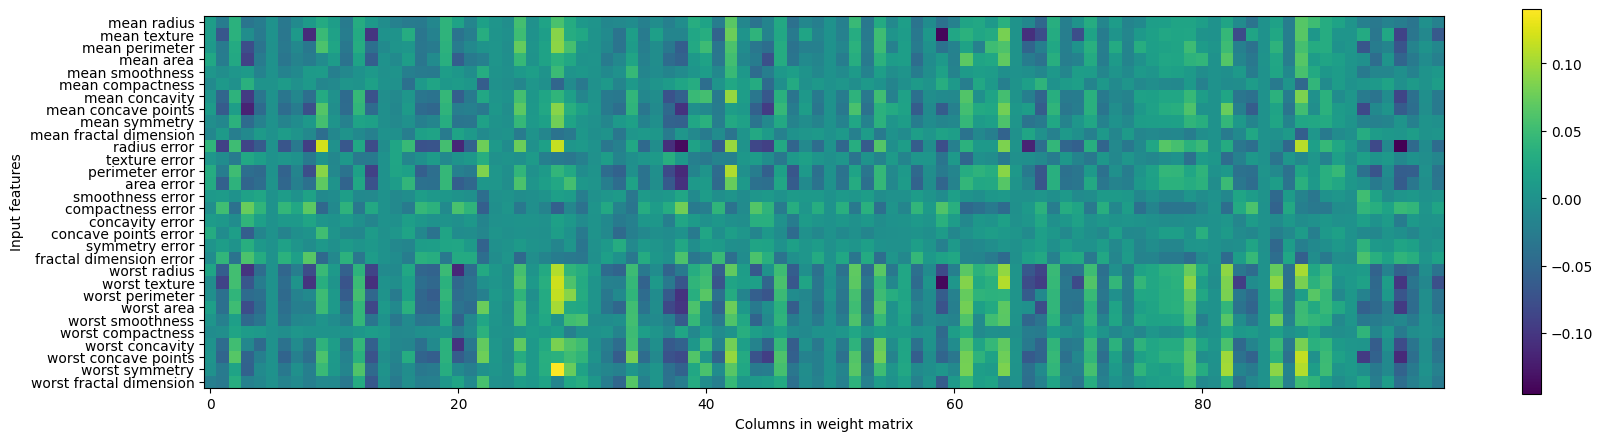

In [28]:
# 学習された（入力層から隠れ層への）重みの表示
print("mlp.coefs_[0].shape: {}".format(mlp.coefs_[0].shape))
plt.figure(figsize=(20, 5))
plt.imshow(mlp.coefs_[0], interpolation='none', cmap='viridis')
plt.yticks(range(30), cancer.feature_names)
plt.xlabel("Columns in weight matrix")
plt.ylabel("Input features")
plt.colorbar()

mlp.coefs_[1].shape: (100, 1)


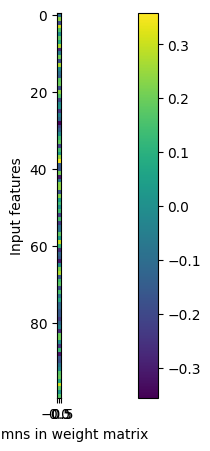

In [29]:
# 学習された（隠れ層から出力層への）重みの表示
print("mlp.coefs_[1].shape: {}".format(mlp.coefs_[1].shape))
plt.figure(figsize=(20, 5))
plt.imshow(mlp.coefs_[1], interpolation='none', cmap='viridis')
plt.xlabel("Columns in weight matrix")
plt.ylabel("Input features")
plt.colorbar()

## ニューラルネットワークの利点、欠点、パラメータ
- 利点
    - 他の手法と比較して、非常に複雑なモデルを構築できる
    - 十分な計算時間とデータがあり、慎重にパラメータを調整すれば、他の機械学習アルゴリズムよりも高性能にできる（クラス分類でも回帰でも）
- 欠点
    - 訓練に時間がかかる
    - データを慎重に前処理する必要がある（データが同質な（すべてのデータが同じ意味を持つ）場合に最もよく機能する
    - さまざまな種類の特徴量を持つデータに関しては、決定木に基づくモデルに劣る
    - パラメータのチューニングが難しい
- パラメータ
    - 隠れ層の数と層あたりのユニット数 ⇒ 少ない層数、ユニット数から始めて、求める性能に合わせて拡張していく
    - 隠れ層のノード数は入力層と同じ程度にすることが多い
    - ノード数の多い層を少数よりも、ノード数の少ない層を多数にするほうが、効率がよい（その代わり学習が複雑になる）
    - パラメータ調整の方法
        1. 過剰適合できるように大きい（多層多ノードの）ネットワークを構築する
        2. タスクがそのネットワークで訓練データを学習できることを確認する
        3. ネットワークを小さくするか、alphaを増やして正則化を強化することで、汎化性能を向上させる
    - デフォルトの最適化手法adam (Adaptive Moment estimation)はほとんどのケースでよく機能するが、データのスケールには非常に敏感
    - lbfgs (limited memory Broyden–Fletcher–Goldfarb–Shanno algorithm)は頑健だが、モデルが大きい場合や大規模なデータセットに対しては、訓練に時間がかかる
    - sgd (Stochastic Gradient Descent)はディープラーニングでよく使われるが、設定パラメータが非常に多く、調整が難しい